In [1]:
import json
import os
import time
import ipyparallel as ipp

import matplotlib.pyplot as plt
import torch
import dfca as DFCA
import numpy as np

from util import *

Reads Config file and prepares the arguments you can choose in the config_dfca.json/config_fixed.json

In [2]:
rc = ipp.Cluster(n=3).start_and_connect_sync()
rc.activate()

rc.ids 

dview = rc[:]

Starting 3 engines with <class 'ipyparallel.cluster.launcher.LocalEngineSetLauncher'>


  0%|          | 0/3 [00:00<?, ?engine/s]

In [3]:
learning_rates = [0.1]

ten = []
twentyfive = []
fifty = []

In [4]:
%%px --targets all

import sys
import os
import random
sys.path.append(os.getcwd())

random.seed(42)
seeds = random.sample(range(10000), 5)
learning_rates = [0.1]

ten = []
twentyfive = []
fifty = []

Running with adaptive lambda


In [5]:
%%px --target 0 --noblock
import dfca as DFCA
import json
import time
import torch
import numpy as np


with open("config.json", "r") as read_file:
    config = json.load(read_file)

r = 10
config['R'] = r

for lr in learning_rates:
    res_final = []

    for seed in seeds:
        print(f"---------------------------------R:{r}, lr: {lr}, seed: {seed}---------------------------------")
        start_time = time.time()
        config['data_seed'] = seed
        config['train_seed'] = config['data_seed']

        print("config:",config)
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        print(f"Using device: {device}")

        exp = DFCA.TrainMNISTCluster(config, device)
        exp.setup()
        res = exp.run()
        res_final.append([[r['test']['loss'] for r in res], [r['test']['acc'] for r in res], [r['test']['cl_acc'] for r in res], [r['train']['loss'] for r in res]])
        del exp
        duration = (time.time() - start_time)
        print("---train cluster Ended in %0.2f hour (%.3f sec) " % (duration/float(3600), duration))

    res_mean = np.mean(res_final, axis=0).tolist()
    ten.append(res_mean)



<AsyncResult(%px): pending>

Running with fixed lambda

In [6]:
%%px --target 1 --noblock
import dfca as DFCA
import json
import time
import torch
import numpy as np

with open("config.json", "r") as read_file:
    config = json.load(read_file)

r = 25
config['R'] = r

for lr in learning_rates:
    res_final = []

    for seed in seeds:
        print(f"---------------------------------R:{r}, lr: {lr}, seed: {seed}---------------------------------")
        start_time = time.time()
        config['data_seed'] = seed
        config['train_seed'] = config['data_seed']

        print("config:",config)
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        print(f"Using device: {device}")

        exp = DFCA.TrainMNISTCluster(config, device)
        exp.setup()
        res = exp.run()
        res_final.append([[r['test']['loss'] for r in res], [r['test']['acc'] for r in res], [r['test']['cl_acc'] for r in res], [r['train']['loss'] for r in res]])
        del exp
        duration = (time.time() - start_time)
        print("---train cluster Ended in %0.2f hour (%.3f sec) " % (duration/float(3600), duration))

    res_mean = np.mean(res_final, axis=0).tolist()
    twentyfive.append(res_mean)



<AsyncResult(%px): pending>

In [7]:
%%px --target 2 --noblock
import dfca as DFCA
import json
import time
import torch
import numpy as np

with open("config.json", "r") as read_file:
    config = json.load(read_file)

r = 50
config['R'] = r

for lr in learning_rates:
    res_final = []

    for seed in seeds:
        print(f"---------------------------------R:{r}, lr: {lr}, seed: {seed}---------------------------------")
        start_time = time.time()
        config['data_seed'] = seed
        config['train_seed'] = config['data_seed']

        print("config:",config)
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        print(f"Using device: {device}")

        exp = DFCA.TrainMNISTCluster(config, device)
        exp.setup()
        res = exp.run()
        res_final.append([[r['test']['loss'] for r in res], [r['test']['acc'] for r in res], [r['test']['cl_acc'] for r in res], [r['train']['loss'] for r in res]])
        del exp
        duration = (time.time() - start_time)
        print("---train cluster Ended in %0.2f hour (%.3f sec) " % (duration/float(3600), duration))

    res_mean = np.mean(res_final, axis=0).tolist()
    fifty.append(res_mean)



<AsyncResult(%px): pending>

## Results

### Outputs


In [8]:
rc.wait_interactive()
_.display_outputs()

ten = rc[0].pull('ten', block=True)
twentyfive = rc[1].pull('twentyfive', block=True)
fifty = rc[2].pull('fifty', block=True)

unknown:   0%|          | 0/3 [00:00<?, ?tasks/s]

---------------------------------R:50, lr: 0.1, seed: 1824---------------------------------
config: {'m': 1200, 'm_test': 200, 'p': 4, 'n': 200, 'uneven': True, 'local_model_init': False, 'R': 50, 'h1': 200, 'num_epochs': 30, 'batch_size': 100, 'tau': 10, 'lr': 0.1, 'data_seed': 1824, 'train_seed': 1824, 'config_override': '', 'project_dir': 'output_dfca_gi'}
Using device: cuda
Epoch -1 tr: l 2.292 a 0.116 clct[np.int64(892), np.int64(109), np.int64(140), np.int64(59)] cl_acc 0.321  11.969sec
Epoch -1 tst: l 2.292 a 0.127 clct[np.int64(151), np.int64(13), np.int64(22), np.int64(14)] cl_acc 0.305  6.443sec
Epoch 0 tr: l 2.132 a 0.326 clct[np.int64(627), np.int64(234), np.int64(215), np.int64(124)] cl_acc 0.423  lr 0.100000 26.367sec(train) 9.506sec(infer)
Epoch 0 tst: l 2.188 a 0.291 clct[np.int64(102), np.int64(44), np.int64(36), np.int64(18)] cl_acc 0.460  7.298sec
result written at output_dfca_gi/results.pickle
checkpoint written at output_dfca_gi/checkpoint.pt
Epoch 1 tr: l 1.949 a 

In [9]:
__.display_outputs()

---------------------------------R:25, lr: 0.1, seed: 1824---------------------------------
config: {'m': 1200, 'm_test': 200, 'p': 4, 'n': 200, 'uneven': True, 'local_model_init': False, 'R': 25, 'h1': 200, 'num_epochs': 30, 'batch_size': 100, 'tau': 10, 'lr': 0.1, 'data_seed': 1824, 'train_seed': 1824, 'config_override': '', 'project_dir': 'output_dfca_gi'}
Using device: cuda
Epoch -1 tr: l 2.292 a 0.116 clct[np.int64(892), np.int64(109), np.int64(140), np.int64(59)] cl_acc 0.321  11.807sec
Epoch -1 tst: l 2.292 a 0.127 clct[np.int64(151), np.int64(13), np.int64(22), np.int64(14)] cl_acc 0.305  6.678sec
Epoch 0 tr: l 2.103 a 0.350 clct[np.int64(688), np.int64(205), np.int64(195), np.int64(112)] cl_acc 0.358  lr 0.100000 20.936sec(train) 11.198sec(infer)
Epoch 0 tst: l 2.188 a 0.295 clct[np.int64(122), np.int64(35), np.int64(26), np.int64(17)] cl_acc 0.390  6.510sec
result written at output_dfca_gi/results.pickle
checkpoint written at output_dfca_gi/checkpoint.pt
Epoch 1 tr: l 1.924 a

In [10]:
___.display_outputs()

---------------------------------R:10, lr: 0.1, seed: 1824---------------------------------
config: {'m': 1200, 'm_test': 200, 'p': 4, 'n': 200, 'uneven': True, 'local_model_init': False, 'R': 10, 'h1': 200, 'num_epochs': 30, 'batch_size': 100, 'tau': 10, 'lr': 0.1, 'data_seed': 1824, 'train_seed': 1824, 'config_override': '', 'project_dir': 'output_dfca_gi'}
Using device: cuda
Epoch -1 tr: l 2.292 a 0.116 clct[np.int64(892), np.int64(109), np.int64(140), np.int64(59)] cl_acc 0.321  11.855sec
Epoch -1 tst: l 2.292 a 0.127 clct[np.int64(151), np.int64(13), np.int64(22), np.int64(14)] cl_acc 0.305  6.678sec
Epoch 0 tr: l 2.066 a 0.398 clct[np.int64(834), np.int64(148), np.int64(145), np.int64(73)] cl_acc 0.319  lr 0.100000 21.025sec(train) 11.146sec(infer)
Epoch 0 tst: l 2.199 a 0.278 clct[np.int64(142), np.int64(24), np.int64(24), np.int64(10)] cl_acc 0.290  6.517sec
result written at output_dfca_gi/results.pickle
checkpoint written at output_dfca_gi/checkpoint.pt
Epoch 1 tr: l 1.857 a 

## Plots

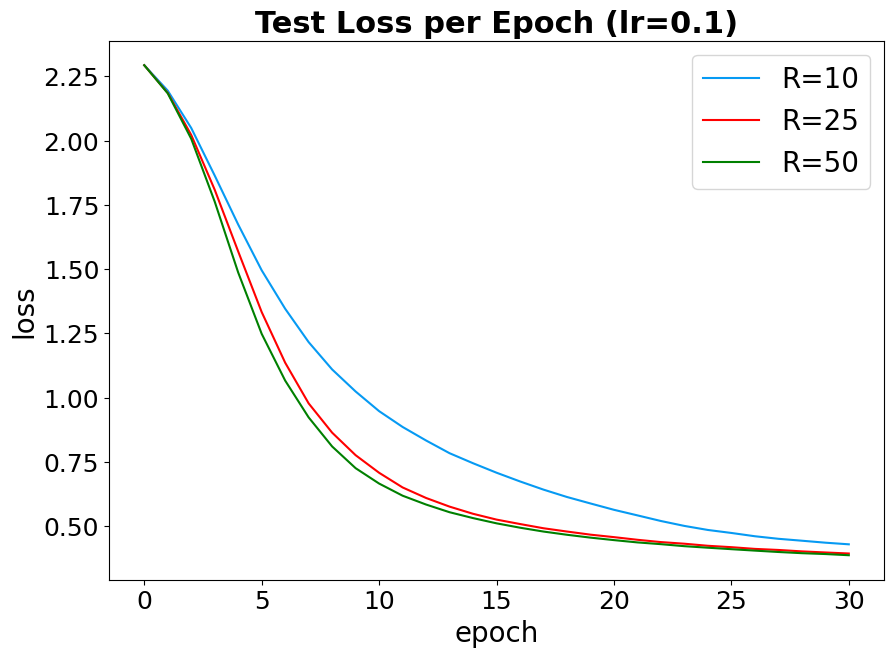

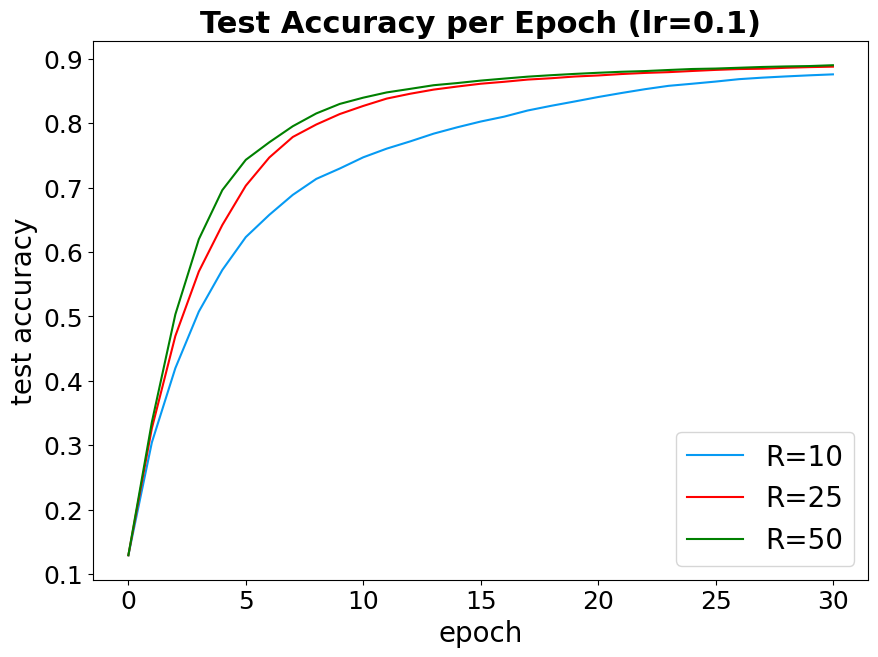

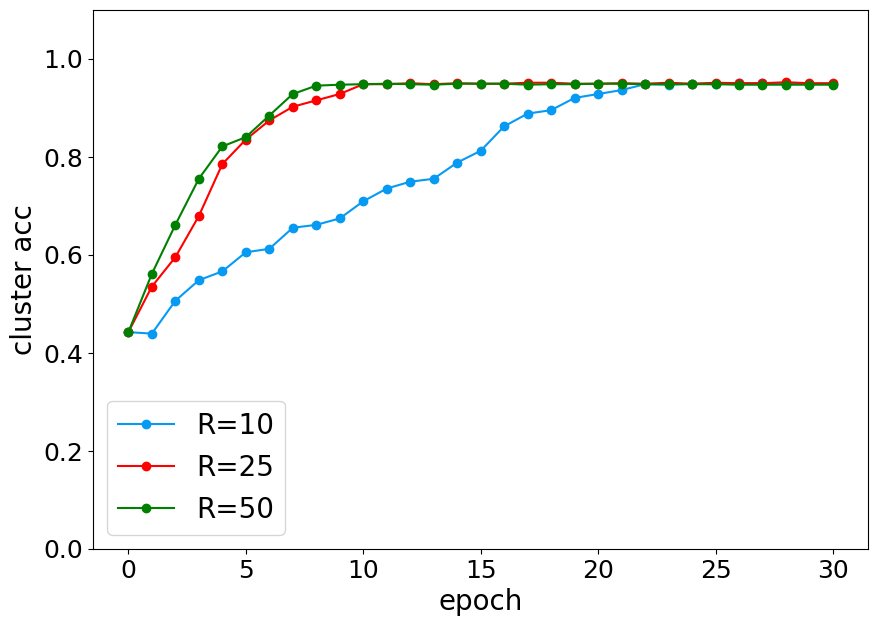

In [11]:

r_ten = {}
r_twentyfive = {}
r_fifty = {}

r_ten['cl_acc'] = []
r_ten['train_loss'] = []
r_ten['test_loss'] = []
r_ten['test_acc'] = []
for i in range(len(learning_rates)):
    r_ten['cl_acc'].append(ten[i][2])
    r_ten['train_loss'].append(ten[i][3])
    r_ten['test_loss'].append(ten[i][0])
    r_ten['test_acc'].append(ten[i][1])

r_twentyfive['cl_acc'] = []
r_twentyfive['train_loss'] = []
r_twentyfive['test_loss'] = []
r_twentyfive['test_acc'] = []
for i in range(len(learning_rates)):
    r_twentyfive['cl_acc'].append(twentyfive[i][2])
    r_twentyfive['train_loss'].append(twentyfive[i][3])
    r_twentyfive['test_loss'].append(twentyfive[i][0])
    r_twentyfive['test_acc'].append(twentyfive[i][1])

r_fifty['cl_acc'] = []
r_fifty['train_loss'] = []
r_fifty['test_loss'] = []
r_fifty['test_acc'] = []
for i in range(len(learning_rates)):
    r_fifty['cl_acc'].append(fifty[i][2])
    r_fifty['train_loss'].append(fifty[i][3])
    r_fifty['test_loss'].append(fifty[i][0])
    r_fifty['test_acc'].append(fifty[i][1])


os.makedirs('graphs', exist_ok=True)

for l in range(len(learning_rates)):

    plt.figure(figsize=(10,7))
    plt.plot(r_ten['test_loss'][l], label='R=10', color='xkcd:azure')
    plt.plot(r_twentyfive['test_loss'][l], label='R=25', color='red')
    plt.plot(r_fifty['test_loss'][l], label='R=50', color='green')
    plt.xlabel('epoch', fontsize=20)
    plt.ylabel('loss', fontsize=20)
    plt.title(f'Test Loss per Epoch (lr={learning_rates[l]})', fontsize=22, fontweight='bold')
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.legend(fontsize=20)
    plt.savefig(os.path.join('graphs', 'train_loss.png'))

    plt.figure(figsize=(10,7))
    plt.plot(r_ten['test_acc'][l], label='R=10', color='xkcd:azure')
    plt.plot(r_twentyfive['test_acc'][l], label='R=25', color='red')
    plt.plot(r_fifty['test_acc'][l], label='R=50', color='green')
    plt.xlabel('epoch', fontsize=20)
    plt.ylabel('test accuracy', fontsize=20)
    plt.title(f'Test Accuracy per Epoch (lr={learning_rates[l]})', fontsize=22, fontweight='bold')
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.legend(fontsize=20)
    plt.savefig(os.path.join('graphs', 'test_acc.png'))

    plt.figure(figsize=(10,7))
    plt.ylim([0, 1.1])
    plt.plot(r_ten['cl_acc'][l], label='R=10', color='xkcd:azure', marker='o')
    plt.plot(r_twentyfive['cl_acc'][l], label='R=25', color='red', marker='o')
    plt.plot(r_fifty['cl_acc'][l], label='R=50', color='green', marker='o')
    plt.xlabel('epoch', fontsize=20)
    plt.ylabel('cluster acc', fontsize=20)
    # plt.title(f'Cluster Accuracy per Epoch (Participation Rate={p_rates[l]})', fontsize=22, fontweight='bold')
    plt.legend(fontsize=20)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.savefig(os.path.join('graphs', f'cluster_acc_pn_{learning_rates[l]}.png'))